Q. How do you implement an RRT in Python

A.

<br />

In [136]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 8
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


class RRT(object):
    
    def random_configuration(self):
        '''Generate a non-collision random configuration
        
        Returns
        -------
        array-like
            the randomly generated (non-collision) configuration
        '''
        raise NotImplemented()
    
    def nearest_vertex(self, q, qs):
        '''Identify the nearest vertex in terms of a metric 
        
        Parameters
        ----------
        q : array-like
            (n,) a sampled configuration
        qs : array-like
            pre-existing configurations
        
        Returns
        -------
        int
            the index of qs the q is closes to according to a metric
        '''
        raise NotImplemented()
    
    def new_configuration(self, q_new, q_rand):
        raise NotImplemented()
    
    def plan(self, q_init, k):

        # We'll maintain a cache of configurations
        configurations = np.zeros((k, q_init.shape[0]))
        
        # We'll use a directed graph to store the tree
        G = nx.DiGraph()
                
        # Ensure that the initial configuration is array-like
        q_init = np.asarray(q_init)
        
        # Insert the initial configuration
        G.add_node(0)
        configurations[0, :] = q_init
        
        # Loop for fixed number of attempts
        for i in xrange(1, k):
            q_rand = self.random_configuration()
            i_near = self.nearest_vertex(q_rand, configurations)
            q_near = configurations[i_near, :]
            q_new = self.new_configuration(q_near, q_rand)
            G.add_node(i)
            configurations[i, :] = q_new
            G.add_edge(i_near, i)
            
        self._insert_configuration_metadata(G, configurations)
        return G

    def _insert_configuration_metadata(self, G, configurations):
        qs = {}
        for i in G.nodes():
            qs[i] = configurations[i, :]
        nx.set_node_attributes(G, 'configuration', qs)
        return G        

    def plot(self):
        pass

In [139]:
# We'll define *all* of this through mixins
# because all of these behaviors are independent
# and this allows maximum composability
    
class FullLengthExtension(object):
    def new_configuration(self, q_near, q_rand):
        return q_rand
    
class UniformRandomSampler(object):
    def random_configuration(self):
        return np.random.uniform(low = 0.0, high = 1.0, size = 2)

class NaiveMinimumDistance(object):
    def nearest_vertex(self, q, configurations):
        # Euclidean metric
        dq = configurations - q
        ds = np.sum(dq**2, axis=1)
        i = np.argmin(ds)
        return i

class StraightLinePlot(object):
    def plot(self, G):
        pos = { i : ps['configuration'] for i, ps in G.nodes(data = True) }
        nx.draw_networkx_edges(G, pos = pos, arrows=False)
        plt.gca().set_xlim(-0.1, 1.1)
        plt.gca().set_ylim(-0.1, 1.1)
        plt.gca().set_aspect('equal')
        

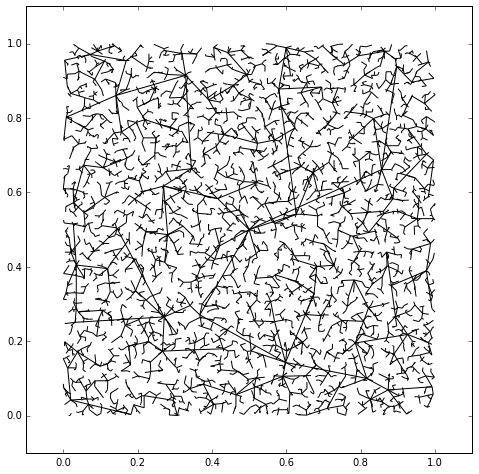

In [140]:
class ExplorationRRT(UniformRandomSampler, 
             EuclideanDistanceMetric, 
             NaiveMinimumDistance, 
             FullLengthExtension,
             StraightLinePlot,
             RRT):
    def __init__(self):
        super(ToyRRT, self).__init__()
        
toy = ToyRRT()
q_init = np.array([0.5, 0.5])
G = toy.plan(q_init, 5000)
toy.plot(G)